In [87]:
import numpy as np
import operator
import os
import cv2
import re
import pylab as pl
from fnmatch import fnmatch
from IPython.core.display import Image
import matplotlib.pyplot as plt
from PIL import Image
from scipy import ndimage

(180, 100)
[180 100]


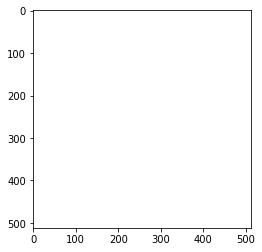

In [88]:
img = np.ones((512,512,3), np.uint8)
img=img*255
plt.imshow(img)
Points=dict()
Points['1']=(np.array([180,100]),(255,0,0),1)    #Location,Color,Weight
Points['2']=(np.array([100,200]),(255,0,0),1)
Points['3']=(np.array([300,150]),(255,0,0),1)
Points['4']=(np.array([350,50]),(0,0,255),1)
Points['5']=(np.array([400,200]),(0,0,255),1)
Points['6']=(np.array([280,300]),(0,0,250),1)
Points['7']=(np.array([200,400]),(255,0,0),1)
Points['8']=(np.array([300,420]),(0,0,255),1)
Points['9']=(np.array([370,320]),(0,0,255),1)

A1=np.array([0,10])
A2=np.array([500,350])

B1=np.array([240,1])
B2=np.array([240,500])

C1=np.array([10,250])
C2=np.array([500,250])

D1=np.array([10,300])
D2=np.array([500,125])

thresh=np.array([10,10])

print(tuple(Points['1'][0]))
print(Points['1'][0])

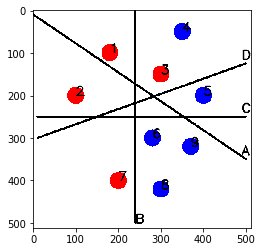

In [89]:

font = cv2.FONT_HERSHEY_SIMPLEX

for keys in Points:
    img = cv2.circle(img,tuple(Points[keys][0]), 20, Points[keys][1], -1)
    cv2.putText(img,keys,tuple(Points[keys][0]), font, 1,(0,0,0),2,cv2.LINE_AA)
img = cv2.line(img,tuple(A1),tuple(A2),(0,0,0),3)
cv2.putText(img,"A",tuple(A2-thresh), font, 1,(0,0,0),2,cv2.LINE_AA)

img = cv2.line(img,tuple(C1),tuple(C2),(0,0,0),3)
cv2.putText(img,"C",tuple(C2-thresh), font, 1,(0,0,0),2,cv2.LINE_AA)

img = cv2.line(img,tuple(D1),tuple(D2),(0,0,0),3)
cv2.putText(img,"D",tuple(D2-thresh), font, 1,(0,0,0),2,cv2.LINE_AA)

img = cv2.line(img,tuple(B1),tuple(B2),(0,0,0),3)
cv2.putText(img,"B",tuple(B2), font, 1,(0,0,0),2,cv2.LINE_AA)
plt.imshow(img)

In [90]:
#if numpy.cross(p-a, b-a) < 0:
print("BELOW LINE A is BLUE\n")
for keys in Points:
    if np.cross(Points[keys][0]-A1, A2-A1) < 0:
        print("Point %s lies Below line A" %keys)
        if Points[keys][1]==(255,0,0):#is RED
            print("And since it is RED, Increasing weight to ",Points[keys][2]+1)#Then Increase its weight
            print("\n")
    else:
        print("Point %s lies Above line A" %keys)
        if Points[keys][1]==(0,0,255):#is BLUE
            print("And since it is BLUE, Increasing weight to ",Points[keys][2]+1)#Then Increase its weight
            print("\n")
print("Right of LINE B is BLUE\n")
for keys in Points:
    if np.cross(Points[keys][0]-B1, B2-B1) < 0:
        print("Point %s lies Left line B" %keys)
        if Points[keys][1]==(0,0,255):#is BLUE
            print("And since it is BLUE, Increasing weight to ",Points[keys][2]+1)#Then Increase its weight
            print("\n")
    else:
        print("Point %s lies Right line B" %keys)
        if Points[keys][1]==(255,0,0):#is RED
            print("And since it is RED, Increasing weight to ",Points[keys][2]+1)#Then Increase its weight
            print("\n")

BELOW LINE A is BLUE

Point 2 lies Below line A
And since it is RED, Increasing weight to  2


Point 1 lies Above line A
Point 9 lies Below line A
Point 4 lies Above line A
And since it is BLUE, Increasing weight to  2


Point 7 lies Below line A
And since it is RED, Increasing weight to  2


Point 8 lies Below line A
Point 3 lies Above line A
Point 5 lies Above line A
And since it is BLUE, Increasing weight to  2


Point 6 lies Below line A
Right of LINE B is BLUE

Point 2 lies Left line B
Point 1 lies Left line B
Point 9 lies Right line B
Point 4 lies Right line B
Point 7 lies Left line B
Point 8 lies Right line B
Point 3 lies Right line B
And since it is RED, Increasing weight to  2


Point 5 lies Right line B
Point 6 lies Right line B
